<div class="alert alert-success">
           <h1 style="font-size:25px;"><strong>Projet 5</strong></h1>
           <h1 style="font-size:25px;"><strong>Segmentez des clients d'un site e-commerce</strong></h1>
</div>

**Olist** souhaite que vous fournissiez à ses équipes d'e-commerce une **segmentation des clients** qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de **comprendre les différents types d’utilisateurs** grâce à leur comportement et à leurs données personnelles.

Vous devrez **fournir à l’équipe marketing une description actionable** de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une **proposition de contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps.

<div class="alert alert-success">
           <h1 style="font-size:25px;"><strong>Étape 1. notebook de l'analyse exploratoire</strong></h1>
</div>

## <font color="#00afe6">Sommaire</font>

[Imports, Chargemernts et connaisance de données. ](#section_A)                                 
[01. Data Schema Olist](#section_1)               
[02. Nettoyage](#section_2)                    
[03. Mapping Categories](#section_3)               
[04. Création-Aggrégation features](#section_4)              
[05. Exploration](#section_5)                                                                               
[06. Export du fichier nettoyé](#section_6)                                    
[07. Liens importants](#section_7)           

<div class="alert alert-success">
    <font id="section_A">
        <h1 style="font-size:25px;"><strong>Imports, Configuration, Versions, Chargements et connaisance de données. </strong></h1>
</div>

In [1]:
#imports
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import seaborn as sns
import sys
import IPython as ip
import statsmodels as stat
import sklearn

import datetime
from statsmodels.tools.sm_exceptions import ConvergenceWarning


import warnings
# Suprimir un warning específico por tipo
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=PerformanceWarning)



In [2]:
# Enregistrer le temps de début
début = time.time()

In [3]:
#configuration
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 70)
pd.set_option('display.precision', 5)
pd.set_option("max_colwidth", 80)
pd.set_option('display.width', 1000)  

In [4]:
# Versions
print('Version des librairies utilisées :')
print('Python          : ' + sys.version)
print('NumPy           : ' + np.version.full_version)
print('Pandas          : ' + pd.__version__)
print('Matplotlib      : ' + mpl.__version__)
print('Seaborn         : ' + sns.__version__)
print('Sklearn         : ' + sklearn.__version__)
print('Geopandas       : ' + sns.__version__)
print('IPython         : ' + ip.__version__)
print('statsmodels     : ' + stat.__version__)


now = datetime.datetime.now().isoformat()
print('Lancé le        : ' + now)

Version des librairies utilisées :
Python          : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
NumPy           : 1.23.5
Pandas          : 1.5.3
Matplotlib      : 3.7.1
Seaborn         : 0.12.2
Sklearn         : 1.2.2
Geopandas       : 0.12.2
IPython         : 8.12.0
statsmodels     : 0.13.5
Lancé le        : 2023-07-03T15:36:09.512913


In [5]:
#chargements
customers       = pd.read_csv('olist_customers_dataset.csv')
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
order_items     = pd.read_csv('olist_order_items_dataset.csv')
order_payments  = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews   = pd.read_csv('olist_order_reviews_dataset.csv')
orders          = pd.read_csv('olist_orders_dataset.csv')
products        = pd.read_csv('olist_products_dataset.csv')
sellers         = pd.read_csv('olist_sellers_dataset.csv')
translation     = pd.read_csv('product_category_name_translation.csv')

### Connaissance du jeu de données

In [6]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [7]:
geolocalisation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP


In [8]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [9]:
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [10]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [11]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [12]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [13]:
translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [14]:
nombres_datasets = ["customers", 
                    "geolocalisation", 
                    "order_items", 
                    "order_payments", 
                    "order_reviews", 
                    "orders", 
                    "products", 
                    "sellers", 
                    "translation"]

In [15]:
liste_df = [customers, 
            geolocalisation,
            order_items,
            order_payments,
            order_reviews,
            orders,products,
            sellers,
            translation]

### Shape pour les datasets/  Données manquantes

In [16]:
nombres_datasets = ["customers", "geolocalisation", "order_items", "order_payments", "order_reviews", "orders", "products", "sellers", "translation"]

# Obtener la longitud máxima entre los nombres de las datasets
max_nombre = max(len(nombre) for nombre in nombres_datasets)

for nombre, df in zip(nombres_datasets, liste_df):
    formato = "Le dataset '{:<{}}' compte {:<7} lignes et {:<1} variables."
    print(formato.format(nombre, max_nombre, df.shape[0], df.shape[1]), end='')

    nb_nan_tot = df.isna().sum().sum()
    nb_donnees_tot = df.size
    pourc_nan_tot = round((nb_nan_tot / nb_donnees_tot) * 100, 2)

    print("Valeurs manquantes: {:<6} NaN pour {:<8} données ({:<4}%)".format(nb_nan_tot, nb_donnees_tot, pourc_nan_tot), end=' ')
    print()


Le dataset 'customers      ' compte 99441   lignes et 5 variables.Valeurs manquantes: 0      NaN pour 497205   données (0.0 %) 
Le dataset 'geolocalisation' compte 1000163 lignes et 5 variables.Valeurs manquantes: 0      NaN pour 5000815  données (0.0 %) 
Le dataset 'order_items    ' compte 112650  lignes et 7 variables.Valeurs manquantes: 0      NaN pour 788550   données (0.0 %) 
Le dataset 'order_payments ' compte 103886  lignes et 5 variables.Valeurs manquantes: 0      NaN pour 519430   données (0.0 %) 
Le dataset 'order_reviews  ' compte 99224   lignes et 7 variables.Valeurs manquantes: 145903 NaN pour 694568   données (21.01%) 
Le dataset 'orders         ' compte 99441   lignes et 8 variables.Valeurs manquantes: 4908   NaN pour 795528   données (0.62%) 
Le dataset 'products       ' compte 32951   lignes et 9 variables.Valeurs manquantes: 2448   NaN pour 296559   données (0.83%) 
Le dataset 'sellers        ' compte 3095    lignes et 4 variables.Valeurs manquantes: 0      NaN pour 1

Pour les datasets: **order_reviews, orders et products**

In [17]:
#1
order_reviews.isna().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Pour order_reviews, les NaN correspondent à des commentaires vides

In [18]:
#2
orders.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
#3
products.isna().sum(axis=0)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [20]:
for nombre, df in zip(nombres_datasets, liste_df):
    duplicates = df.duplicated().sum()
    print("Le dataset '{:<{}}' compte {} duplicates".format(nombre, max_nombre, duplicates))

Le dataset 'customers      ' compte 0 duplicates
Le dataset 'geolocalisation' compte 261831 duplicates
Le dataset 'order_items    ' compte 0 duplicates
Le dataset 'order_payments ' compte 0 duplicates
Le dataset 'order_reviews  ' compte 0 duplicates
Le dataset 'orders         ' compte 0 duplicates
Le dataset 'products       ' compte 0 duplicates
Le dataset 'sellers        ' compte 0 duplicates
Le dataset 'translation    ' compte 0 duplicates


<div class="alert alert-success">
    <font id="section_1">
    <h1 style="font-size:25px;"><strong>01. Data Schema Olist</strong></h1>
</div>

[Explication](#section_Dataset)

[camino]:DataSchemaOlist.png
![alt text][camino]

In [21]:
resume_data = []
for i, df in enumerate(liste_df):
    data = [[nombres_datasets[i], column, df[column].dtype, df[column].nunique()] for column in df.columns]
    resume_data.extend(data)

resume_data = pd.DataFrame(resume_data, columns=['Dataset', 'Nom colonne', 'Type', 'valeurs uniques'])
resume_data

,Dataset,Nom colonne,Type,valeurs uniques
0,customers,customer_id,object,99441
1,customers,customer_unique_id,object,96096
2,customers,customer_zip_code_prefix,int64,14994
3,customers,customer_city,object,4119
4,customers,customer_state,object,27
5,geolocalisation,geolocation_zip_code_prefix,int64,19015
6,geolocalisation,geolocation_lat,float64,717360
7,geolocalisation,geolocation_lng,float64,717613
8,geolocalisation,geolocation_city,object,8011
9,geolocalisation,geolocation_state,object,27


## Observations

1. Dans le jeu de données "customers" :
   - L'attribut "customer_id" a 99441 valeurs uniques, tandis que "customer_unique_id" a 96096 valeurs uniques. Cela peut indiquer que certains clients ont plus d'une identifiant unique ou qu'il y a des doublons dans les données.
   - L'attribut "customer_state" pourrait être catégorisé pour faciliter l'analyse.

2. Dans le jeu de données "geolocalisation" :
   - Il y a plus de villes que dans le jeu de données "customers". Cela peut être dû à l'existence d'enregistrements de localisation géographique qui ne sont pas directement associés aux clients.
   - L'attribut "geolocation_state" pourrait également être catégorisé pour faciliter l'analyse.

3. Dans le jeu de données "order_items" :
   - L'attribut "order_item_id" contient 21 types différents. Cela peut indiquer la présence de plusieurs éléments dans une seule commande.
   - L'attribut "seller_id" a le même nombre de valeurs uniques que dans le jeu de données "sellers", ce qui est attendu car il représente les vendeurs.

4. Dans le jeu de données "order_payments" :
   - Les attributs "payment_sequential" et "payment_type" pourraient être catégorisés pour faciliter l'analyse.

5. Dans le jeu de données "orders" :
   - Les attributs liés aux dates, tels que "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date" et "order_estimated_delivery_date", doivent être convertis au format de date pour effectuer une analyse temporelle appropriée.
   - L'attribut "order_status" a 8 valeurs uniques qui représentent l'état de la commande.

6. Dans le jeu de données "products" :
   - Il y a 74 catégories différentes.
   - L'attribut "product_category_name" représente le nom de la catégorie du produit.
   - L'attribut "product_name_length" représente la longueur du nom du produit.
   - L'attribut "product_description_length" représente la longueur de la description du produit.
   - L'attribut "product_photos_qty" représente la quantité de photos du produit.
   - Les attributs "product_weight_g", "product_length_cm", "product_height_cm" et "product_width_cm" représentent respectivement le poids, la longueur, la hauteur et la largeur du produit.


<div class="alert alert-success">
    <font id="section_2">
    <h1 style="font-size:25px;"><strong>02. Nettoyage</strong></h1>
</div>

In [22]:
import pandas as pd

def nettoyage(liste_donnees):
    '''Nettoyage des différents dataframe
    Entrée : liste de 9 dataframes
    
    Traitement appliqué : 
    * complétion des NaN, 
    * nettoyage type, 
    * merge catégories de produits
    
    Return : liste des dataframe nettoyée
    '''
    if not isinstance(liste_donnees, list) or len(liste_donnees) != 9:
        return False

    customers_local       = liste_donnees[0].copy()
    geolocalisation_local = liste_donnees[1].drop_duplicates().copy()
    order_items_local     = liste_donnees[2].copy()
    order_payments_local  = liste_donnees[3].copy()
    order_reviews_local   = liste_donnees[4].copy()
    orders_local          = liste_donnees[5].copy()
    products_local        = liste_donnees[6].copy()
    sellers_local         = liste_donnees[7].copy()
    translation_local     = liste_donnees[8].copy()

    #Traitement des NaN
    order_reviews_local['review_comment_title'].fillna(' ', inplace=True)
    order_reviews_local['review_comment_message'].fillna(' ', inplace=True)
    
    orders_local['order_approved_at'].fillna(-1, inplace=True)
    orders_local['order_delivered_carrier_date'].fillna(0, inplace=True)
    orders_local['order_delivered_customer_date'].fillna(0, inplace=True)
    
    products_local['product_category_name'].fillna('Unkwown', inplace=True)
    products_local['product_name_lenght'].fillna(0, inplace=True)
    products_local['product_description_lenght'].fillna(0, inplace=True)
    products_local['product_photos_qty'].fillna(0, inplace=True)
    products_local['product_weight_g'].fillna(0, inplace=True)
    products_local['product_length_cm'].fillna(0, inplace=True)
    products_local['product_height_cm'].fillna(0, inplace=True)
    products_local['product_width_cm'].fillna(0, inplace=True)
    
    #nettoyage types:
    order_items_local['shipping_limit_date']      = pd.to_datetime(order_items_local['shipping_limit_date'], errors='coerce')
    orders_local['order_purchase_timestamp']      = pd.to_datetime(orders_local['order_purchase_timestamp'], errors='coerce')
    orders_local['order_approved_at']             = pd.to_datetime(orders_local['order_approved_at'], errors='coerce')
    orders_local['order_delivered_carrier_date']  = pd.to_datetime(orders_local['order_delivered_carrier_date'], errors='coerce')
    orders_local['order_delivered_customer_date'] = pd.to_datetime(orders_local['order_delivered_customer_date'], errors='coerce')
    orders_local['order_estimated_delivery_date'] = pd.to_datetime(orders_local['order_estimated_delivery_date'], errors='coerce')
    
    #merge des catégories de produits
    products_local = pd.merge(products_local, translation_local).drop(['product_category_name'], axis=1)
    
    return [
        customers_local, 
        geolocalisation_local, 
        order_items_local, 
        order_payments_local, 
        order_reviews_local, 
        orders_local, 
        products_local, 
        sellers_local, 
        translation_local]


In [23]:
liste_df = nettoyage(liste_df)

<div class="alert alert-success">
    <font id="section_3">
    <h1 style="font-size:25px;"><strong>03. Mapping Categories</strong></h1>
</div>

In [24]:
dict_categories = {
# 01 home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
# 02 appliances
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',
    
# 03 construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
# 04 furnitures
    
# 05 office
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',

# 06 electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
    
# 07 sports_leisure
'sports_leisure' : 'sports_leisure',
'musical_instruments': 'sports_leisure',
'party_supplies': 'sports_leisure',
'luggage_accessories': 'sports_leisure',

# 08 arts
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
    
# 09 fashion
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
    
# 10 health_beauty
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
    
# 11 garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
    
# 12 auto
'auto' : 'auto',
    
# 13 food_drinks
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
    
# 14 other
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

<div class="alert alert-success">
    <font id="section_4">
    <h1 style="font-size:25px;"><strong>04. Création-Aggrégation features</strong></h1>
</div>

In [25]:
def apply_features(liste_donnees):
    '''
    Application traitement complet et création de nouvelles features
    
    Traitement:
    * Création de nouvelles features
    * Merge de l'ensemble des dataframe dans un seul dataframe sur la clé client unique
    
    
    Entree : liste d'objets 
    Sortie : dataframe cleané
    '''
    
    print('Création features.....')
    customers_local, geolocalisation_local, order_items_local, order_payments_local, \
    order_reviews_local, orders_local, products_local, sellers_local, translation_local = liste_donnees

    #Nombre d'achats total par client
    produits_par_client = pd.merge(customers_local, pd.merge(order_items_local, orders_local))
    
    nb_produits = produits_par_client.groupby('customer_id')['product_id'].count()
    nb_produits.rename('Nb_pdts', inplace=True)
    
    # 100 premières villes
    first_cities = customers_local.groupby('customer_city')['customer_state'].count() \
        .nlargest(100).index.tolist()
    customers_local.loc[~customers_local['customer_city'].isin(first_cities), 'customer_city'] = 'Other'
    
    # Catégorie la plus achetée
    cat = pd.merge(produits_par_client, products_local).sort_values(['customer_id', 'product_category_name_english'], ascending=False) \
        .groupby(['customer_id', 'product_category_name_english']).head(1)[['customer_unique_id', 'product_category_name_english']]
    cat.columns = ['customer_unique_id', 'Cat_la_plus_achetee']
    cat.set_index('customer_unique_id', inplace=True)
    
    # Montant moyen des achats
    achats_moy = pd.merge(order_items_local, orders_local).groupby(['customer_id', 'order_id'])['price'].sum() \
        .groupby(['customer_id']).mean()
    achats_moy.rename('Tot_moy_achats', inplace=True)
    
    # Montant maximum des achats
    achats_max = pd.merge(order_items_local, orders_local).groupby(['customer_id', 'order_id'])['price'].max() \
        .groupby(['customer_id']).max()
    achats_max.rename('Mont_max_achats', inplace=True)
    
    # Nombre moyen de produits par commande
    nb_moyen_prod = pd.merge(order_items_local, orders_local).groupby(['customer_id', 'order_id'])['price'].count() \
        .groupby(['customer_id']).mean()
    nb_moyen_prod.rename('Nb_moy_pdts_par_com', inplace=True)
    
    # Délai moyen de livraison
    delai_delivery = pd.merge(orders_local, order_items_local)
    delai_delivery.set_index('customer_id', inplace=True)
    delai_delivery = delai_delivery['order_delivered_customer_date'] - delai_delivery['order_purchase_timestamp']
    delai_delivery.rename('Delai_Moy_Commande', inplace=True)
    delai_delivery = delai_delivery.dt.days + 1
    
    # Heure du dernier achat
    date_achat = pd.merge(order_items_local, orders_local)[['customer_id', 'order_purchase_timestamp']] \
        .groupby(['customer_id']).max()
    date_achat['heure_achat'] = date_achat['order_purchase_timestamp'].dt.hour
    
    # Jour de la semaine du dernier achat
    date_achat['jour_achat'] = date_achat['order_purchase_timestamp'].dt.weekday
    
    # Nombre de jours écoulés depuis le dernier achat
    date_achat['delai_dernier_achat'] = (date_achat['order_purchase_timestamp'].max() - date_achat['order_purchase_timestamp']).dt.days
    
    # Note moyenne des commentaires
    note_moy = pd.merge(order_reviews_local, orders_local).groupby('customer_id')['review_score'].mean()
    note_moy.rename('Note_Moy_Com', inplace=True)
    
    # Moyen de paiement le plus utilisé
    paiement = pd.merge(orders_local, order_payments_local).sort_values(['customer_id', 'payment_type', 'payment_installments'], ascending=False) \
        .groupby(['customer_id', 'payment_type', 'payment_installments']).head(1)[['customer_id', 'payment_type', 'payment_installments']]
    paiement.columns = ['customer_id', 'Moy_Paiment', 'Facilités']
    paiement.set_index('customer_id', inplace=True)

    customers_local.set_index('customer_id', inplace=True)

    dataframes = [nb_produits, achats_moy, achats_max, delai_delivery, nb_moyen_prod, date_achat, note_moy, paiement]

    for df in dataframes:
        customers_local = customers_local.merge(df, how='left', left_index=True, right_index=True)

    customers_local.reset_index(inplace=True)
    cat.reset_index(inplace=True)

    customers_local['customer_id'] = customers_local['customer_id'].astype('object')
    cat['customer_unique_id'] = cat['customer_unique_id'].astype('object')

    customers_local = pd.merge(left=cat, right=customers_local, on='customer_unique_id', how='right')
    customers_local.reset_index(inplace=True)

    print('Cleaning NaN....')
    customers_local['Cat_la_plus_achetee'].fillna('Unknown', inplace=True)
    customers_local.dropna(subset=['Nb_pdts', 'Tot_moy_achats', 'Mont_max_achats', 'Nb_moy_pdts_par_com'], how='all', inplace=True)
    customers_local['Delai_Moy_Commande'].fillna(-1, inplace=True)
    customers_local.dropna(inplace=True)

    print('Aggrégation des features sur id client unique...')
    
    dict_agg = {
           'Cat_la_plus_achetee': lambda x: x.mode()[0],
           'customer_zip_code_prefix': lambda x: x.mode()[0],
           'customer_city': lambda x: x.mode()[0],
           'customer_state': lambda x: x.mode()[0],
           'Nb_pdts': 'sum',
           'Tot_moy_achats': 'mean',
           'Mont_max_achats': 'max',
           'Delai_Moy_Commande': 'mean',
           'Nb_moy_pdts_par_com': 'mean',
           'order_purchase_timestamp': 'max',
           'heure_achat': lambda x: x.mode()[0],
           'jour_achat': lambda x: x.mode()[0],
           'delai_dernier_achat': 'min',
           'Note_Moy_Com': 'mean',
           'Moy_Paiment': lambda x: x.mode()[0],
           'Facilités': 'mean',
           'geolocation_lat': 'mean',
           'geolocation_lng': 'mean',
          ('price', 'home'): 'sum',
          ('price', 'appliances'): 'sum',
          ('price', 'construction'): 'sum',
          ('price', 'office'): 'sum',
          ('price', 'electronics'): 'sum',
          ('price', 'arts'): 'sum',
          ('price', 'fashion'): 'sum',
          ('price', 'health_beauty'): 'sum',
          ('price', 'sports_leisure'): 'sum',
          ('price', 'garden_pets'): 'sum',
          ('price', 'auto'): 'sum',
          ('price', 'food_drinks'): 'sum',
          ('price', 'other'): 'sum'
         }
    
    #######################################################
    
    

    #######################################################

    print('Ajout des dépenses par catégories ...')
    table_cat = pd.merge(customers_local, pd.merge(
    pd.merge(pd.merge(products_local, translation_local), order_items_local), orders_local
     ))[['customer_unique_id', 'product_category_name_english', 'price']]

    table_cat['product_category_name_english'] = table_cat['product_category_name_english'].map(dict_categories)

    table_cat = pd.pivot_table(table_cat,
                           index='customer_unique_id',
                           columns='product_category_name_english',
                           aggfunc=np.sum,
                           fill_value=0).reset_index()

    customers_local = pd.merge(customers_local, table_cat, on='customer_unique_id')

    geol = pd.merge(customers_local, geolocalisation_local, how='left',
                left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').groupby(
    'customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']].reset_index()

    customers_local = pd.merge(customers_local, geol, on='customer_unique_id')

    customers_local = customers_local.groupby('customer_unique_id').agg(dict_agg)
    customers_local['Cat_la_plus_achetee'] = customers_local['Cat_la_plus_achetee'].map(dict_categories)
    
    print('taille du jeu de données ... : ', customers_local.shape)
 
    print('Log transformation....')
    columns_log = ['Tot_moy_achats', 'Mont_max_achats']
    customers_local[columns_log] = np.log(customers_local[columns_log])
    return customers_local




In [26]:
data_clients = apply_features(liste_df)

Création features.....
Cleaning NaN....
Aggrégation des features sur id client unique...
Ajout des dépenses par catégories ...


C:\Users\oscar\AppData\Local\Temp\ipykernel_27608\1674927065.py:155: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  customers_local = pd.merge(customers_local, table_cat, on='customer_unique_id')


taille du jeu de données ... :  (93396, 31)
Log transformation....


In [27]:
data_clients.head()

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Mont_max_achats,Delai_Moy_Commande,Nb_moy_pdts_par_com,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.86676,4.86676,7.0,1.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.34026,-46.83108,129.9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.93916,2.93916,4.0,1.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.55904,-46.78852,0.0,0.0,0.0,0.0,0.00,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.23411,4.23411,26.0,1.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.54301,-48.63494,0.0,0.0,0.0,69.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,electronics,66812,belem,PA,1.0,3.25771,3.25771,21.0,1.0,2017-10-12 20:29:41,20.0,3.0,325.0,4.0,credit_card,4.0,-1.31273,-48.48275,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.19296,5.19296,14.0,1.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.50559,-47.46982,0.0,0.0,0.0,0.0,180.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
columnas = data_clients.columns

# Créer une nouvelle liste de noms de colonnes modifiés
nuevas_columnas = [col[1] if isinstance(col, tuple) and col[0] == 'price' else col for col in columnas]

# Attribuer les nouveaux noms de colonnes au dataframe
data_clients.columns = nuevas_columnas

# Afficher le dataframe avec les nouvelles colonnes
data_clients.columns

Index(['Cat_la_plus_achetee', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'Nb_pdts', 'Tot_moy_achats', 'Mont_max_achats', 'Delai_Moy_Commande', 'Nb_moy_pdts_par_com', 'order_purchase_timestamp', 'heure_achat', 'jour_achat', 'delai_dernier_achat', 'Note_Moy_Com', 'Moy_Paiment', 'Facilités', 'geolocation_lat', 'geolocation_lng', 'home', 'appliances', 'construction', 'office', 'electronics', 'arts', 'fashion', 'health_beauty', 'sports_leisure', 'garden_pets', 'auto', 'food_drinks', 'other'], dtype='object')

In [29]:
data_clients.head()

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Mont_max_achats,Delai_Moy_Commande,Nb_moy_pdts_par_com,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,home,appliances,construction,office,electronics,arts,fashion,health_beauty,sports_leisure,garden_pets,auto,food_drinks,other
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.86676,4.86676,7.0,1.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.34026,-46.83108,129.9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.93916,2.93916,4.0,1.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.55904,-46.78852,0.0,0.0,0.0,0.0,0.00,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.23411,4.23411,26.0,1.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.54301,-48.63494,0.0,0.0,0.0,69.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,electronics,66812,belem,PA,1.0,3.25771,3.25771,21.0,1.0,2017-10-12 20:29:41,20.0,3.0,325.0,4.0,credit_card,4.0,-1.31273,-48.48275,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.19296,5.19296,14.0,1.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.50559,-47.46982,0.0,0.0,0.0,0.0,180.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-success">
    <font id="section_5">
    <h1 style="font-size:25px;"><strong>05. Exploration</strong></h1>
</div>

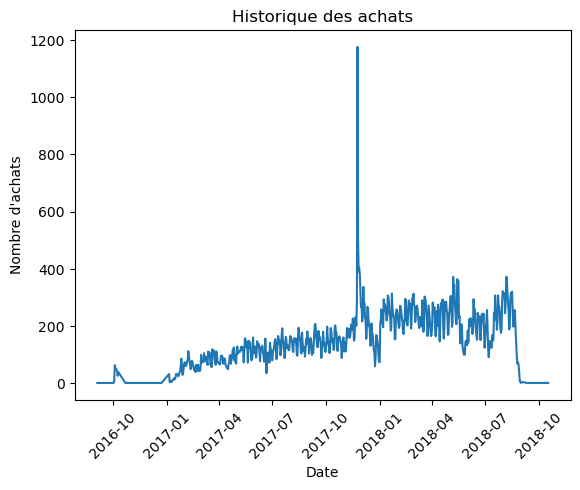

In [30]:
import matplotlib.pyplot as plt

# Convertir la colonne "order_purchase_timestamp" au format de date
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Regrouper les achats par date et compter le nombre d'achats à chaque date
daily_orders = orders.groupby(orders['order_purchase_timestamp'].dt.date).size()

# Créer le graphique de séries chronologiques
plt.plot(daily_orders.index, daily_orders.values)
plt.xlabel('Date')
plt.ylabel('Nombre d\'achats')
plt.title('Historique des achats')
plt.xticks(rotation=45)
plt.show()



In [31]:
min_date = orders['order_purchase_timestamp'].min()
max_date = orders['order_purchase_timestamp'].max()
diferencia_annees = (max_date - min_date).days / 365
print("Date d'achat minimale:", min_date)
print("Date d'achat maximale:", max_date)
print("Differencie en années:", diferencia_annees)

Date d'achat minimale: 2016-09-04 21:15:19
Date d'achat maximale: 2018-10-17 17:30:18
Differencie en années: 2.115068493150685


**Nombre de clients**

In [32]:
print("Nombre de clients uniques:", customers['customer_unique_id'].nunique())

Nombre de clients uniques: 96096


**Nombre de clients**

In [33]:
print("Nombre de clients uniques:", orders['order_id'].nunique())

Nombre de clients uniques: 99441


**Nombre de vendeurs**

In [34]:
print("Nombre de vendeurs uniques:", sellers['seller_id'].nunique())

Nombre de vendeurs uniques: 3095


**Nombre de clients par vendeur**

In [35]:
print("Nombre de clients par vendeur: ",
pd.merge(order_items, orders).groupby(['seller_id','customer_id']).count().reset_index().groupby('seller_id').count()['customer_id'].sum())

Nombre de clients par vendeur:  100010


## Distribution des variables

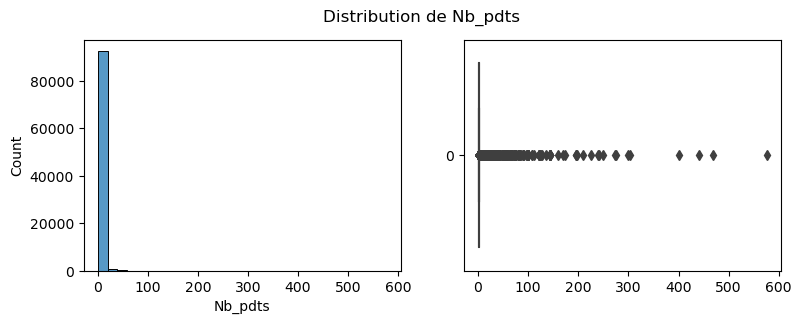

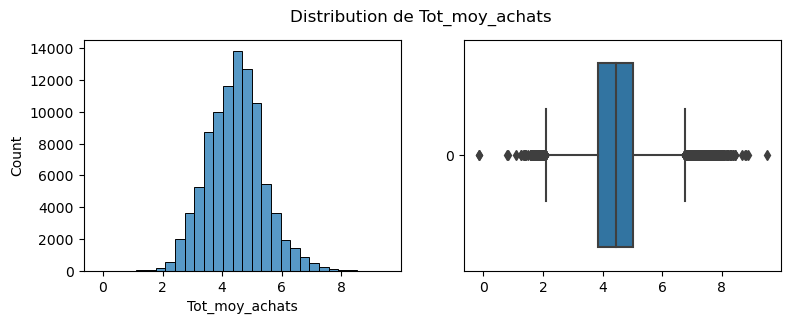

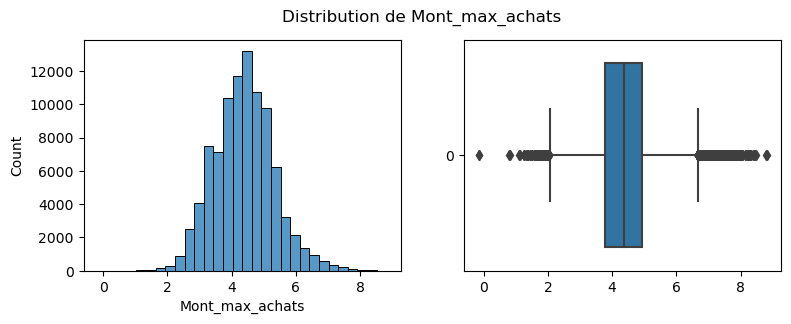

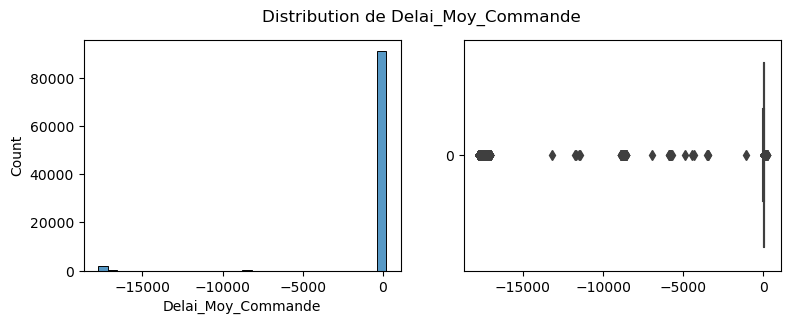

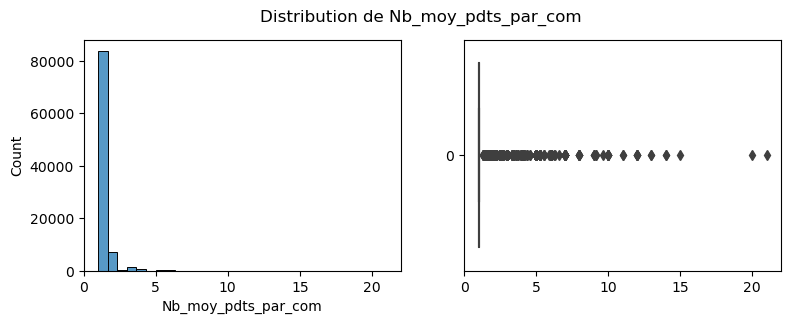

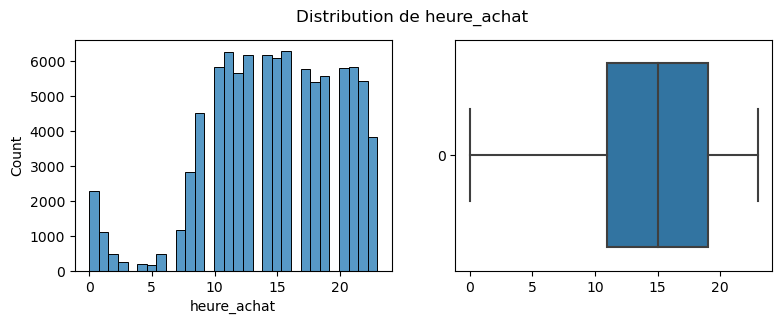

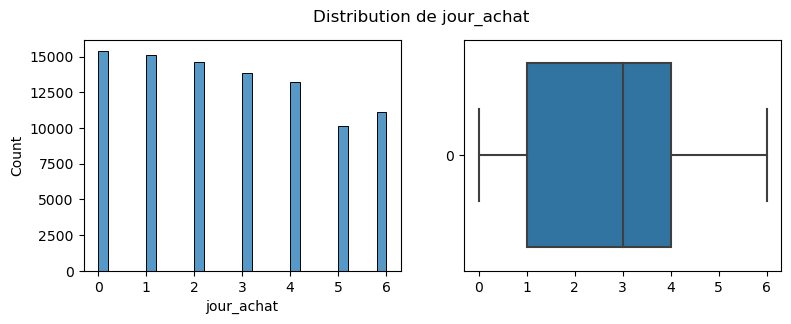

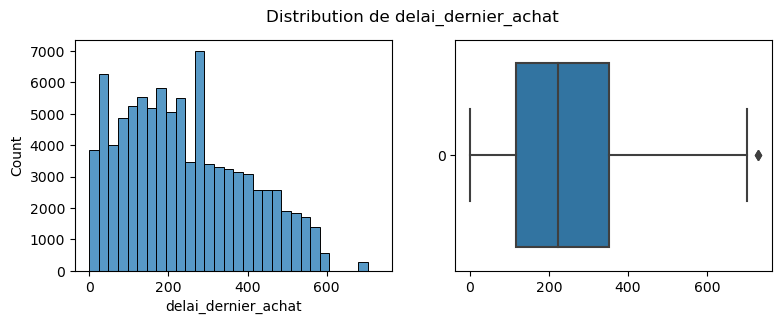

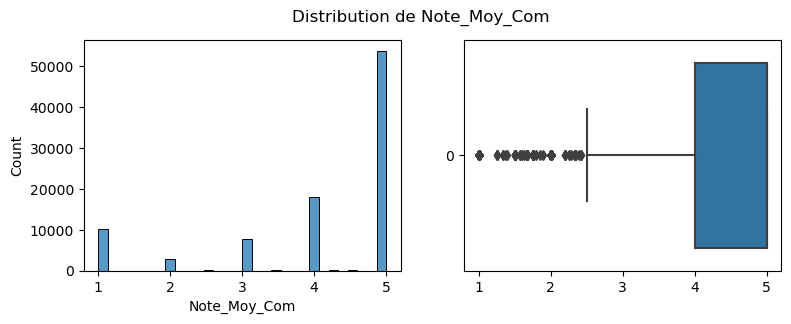

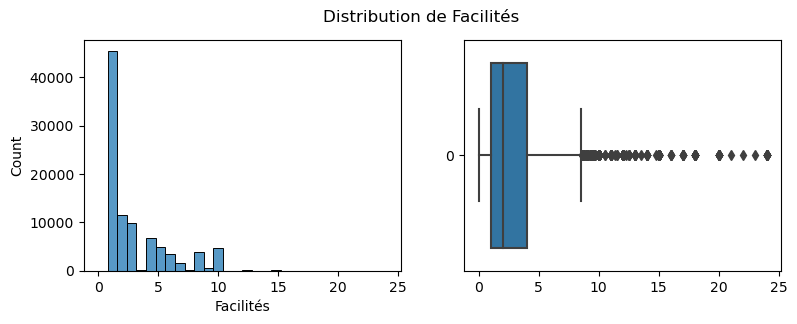

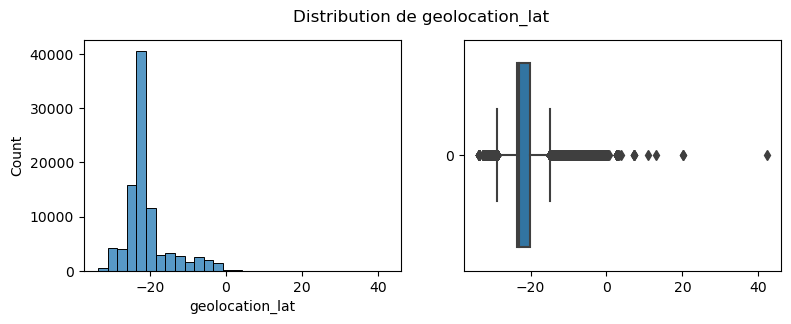

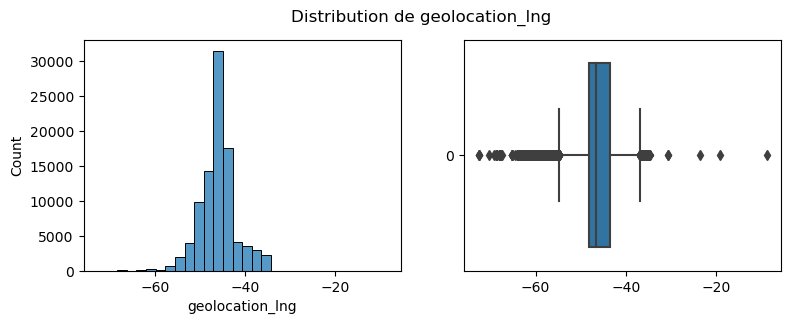

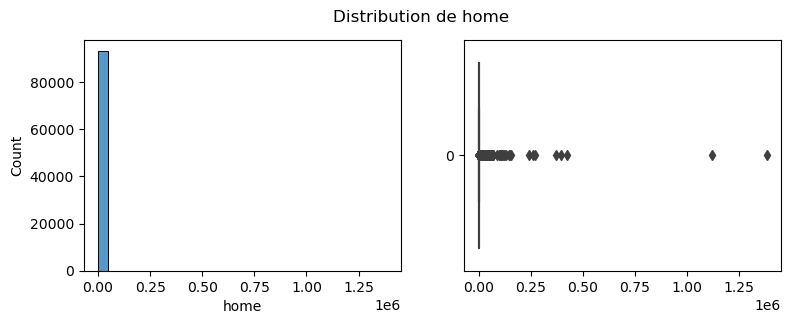

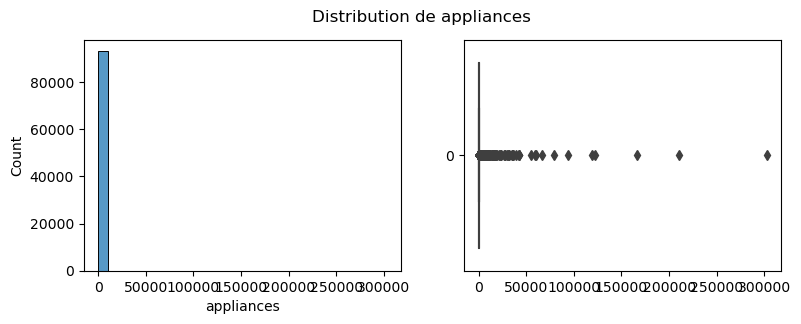

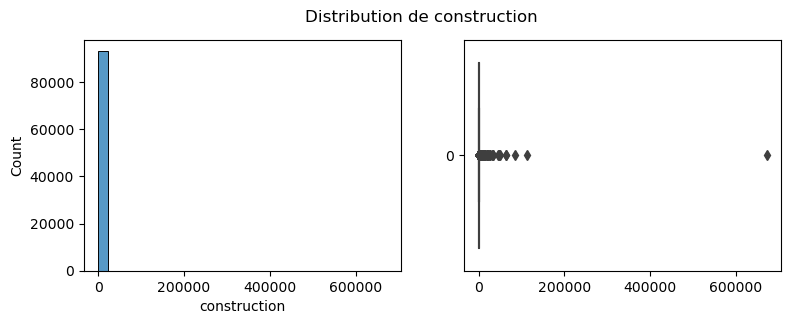

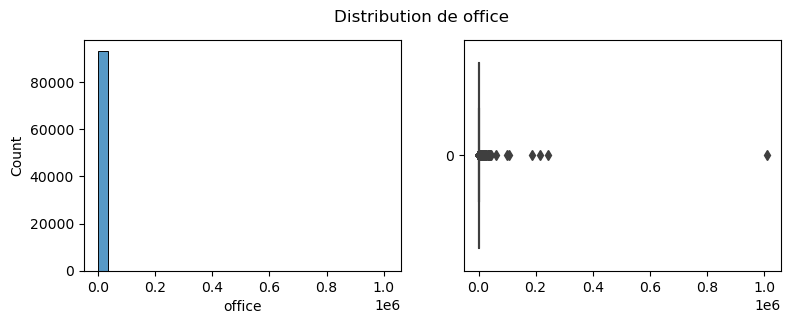

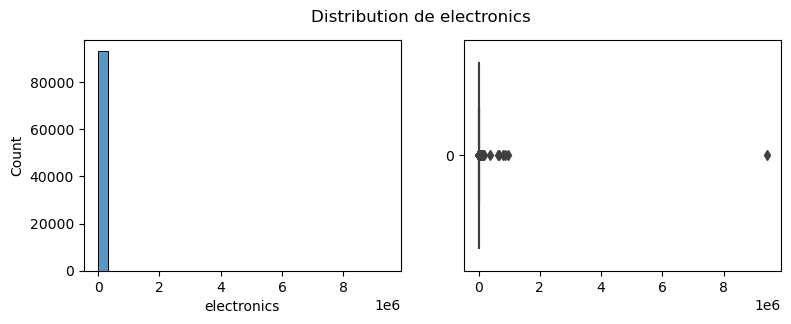

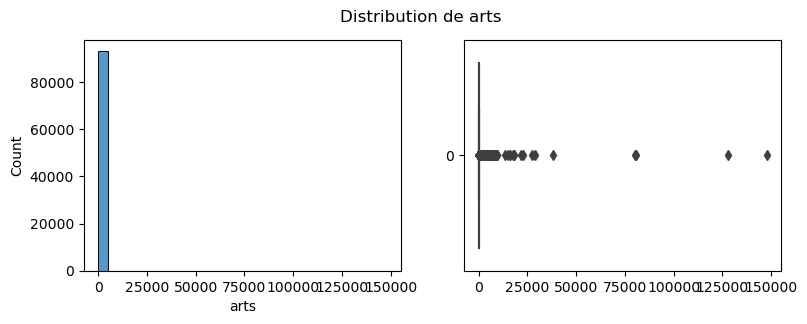

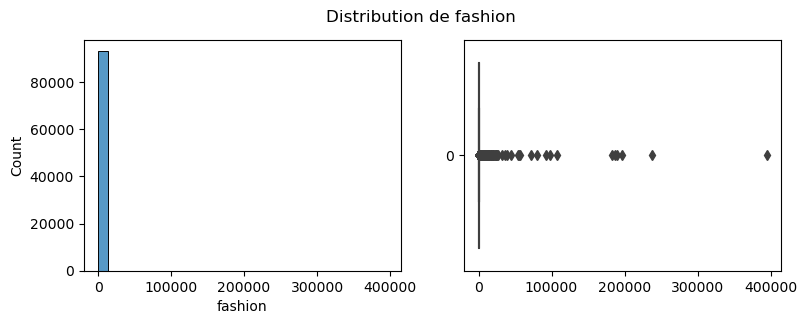

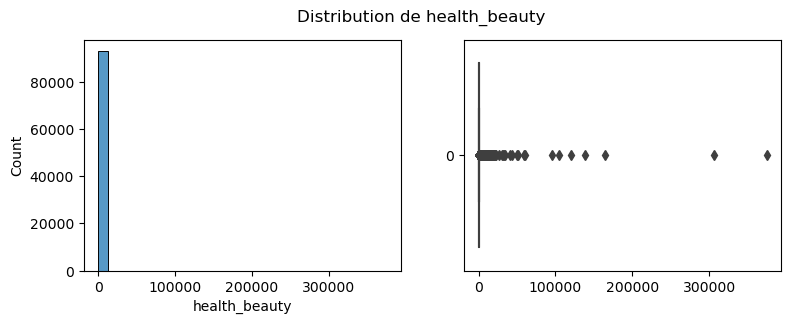

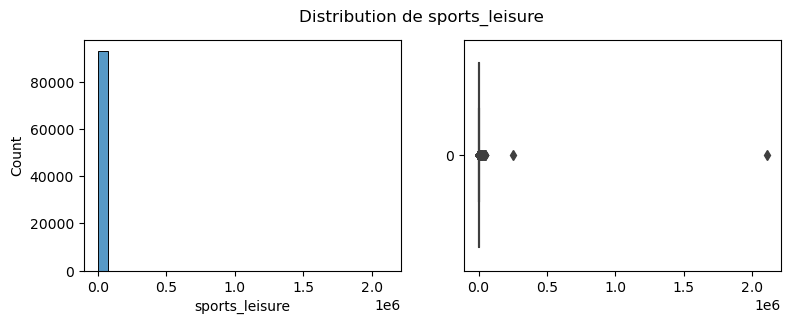

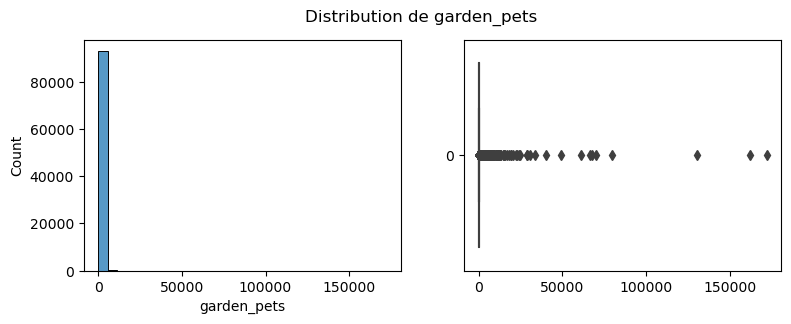

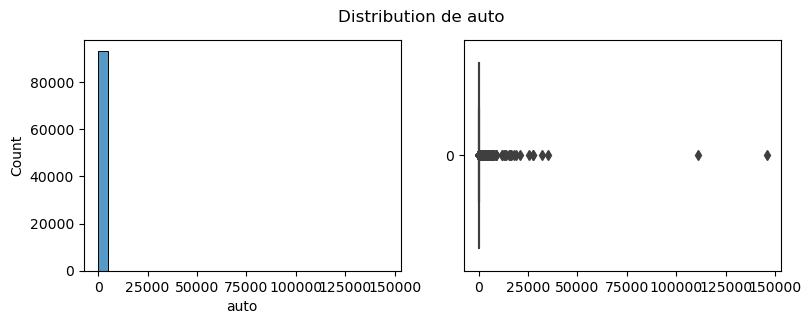

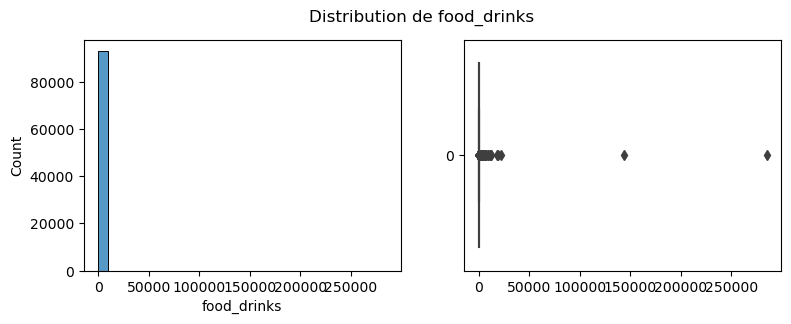

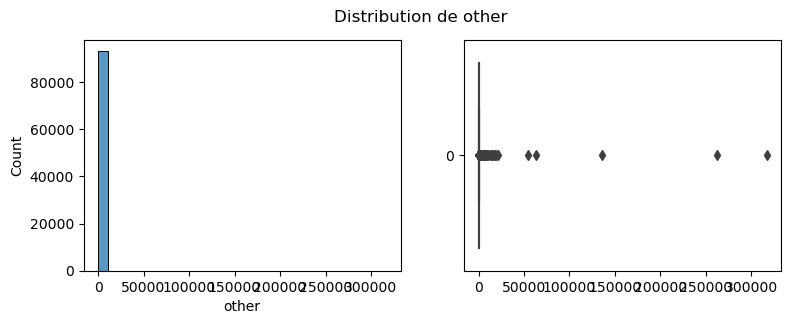

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in data_clients.select_dtypes(['int32', 'float64']).columns:
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    fig.suptitle('Distribution de ' + str(column))
    
    # Histograma
    sns.histplot(data_clients[column], bins=30, ax=axes[0])
    
    # Boxplot horizontal
    sns.boxplot(data_clients[column], ax=axes[1], orient="horizontal")
    
    plt.show()


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in data_clients.select_dtypes(['int32', 'float64']).columns:
    if 'price' in column:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        fig.suptitle('Distribution de ' + str(column) + ' sans valeur nulle')
        
        # Filtrar valores no nulos ni ceros
        data_filtered = data_clients[(data_clients[column].notnull()) & (data_clients[column] != 0)]
        
        if not data_filtered.empty:
            # Histograma
            sns.histplot(data_filtered[column], bins=30, ax=axes[0])
            
            # Boxplot
            sns.boxplot(data_filtered[column], ax=axes[1])
        
        plt.show()


In [38]:
data_clients

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Mont_max_achats,Delai_Moy_Commande,Nb_moy_pdts_par_com,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,home,appliances,construction,office,electronics,arts,fashion,health_beauty,sports_leisure,garden_pets,auto,food_drinks,other
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.86676,4.86676,7.0,1.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.34026,-46.83108,129.9,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.93916,2.93916,4.0,1.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.55904,-46.78852,0.0,0.0,0.0,0.0,0.00,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.23411,4.23411,26.0,1.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.54301,-48.63494,0.0,0.0,0.0,69.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,electronics,66812,belem,PA,1.0,3.25771,3.25771,21.0,1.0,2017-10-12 20:29:41,20.0,3.0,325.0,4.0,credit_card,4.0,-1.31273,-48.48275,0.0,0.0,0.0,0.0,25.99,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.19296,5.19296,14.0,1.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.50559,-47.46982,0.0,0.0,0.0,0.0,180.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,health_beauty,55250,Other,PE,4.0,7.35883,6.79122,28.0,2.0,2017-06-08 21:00:36,21.0,3.0,451.0,5.0,credit_card,10.0,-8.36265,-36.56210,0.0,0.0,0.0,0.0,0.00,0.0,0.0,6280.00,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,health_beauty,44054,feira de santana,BA,1.0,4.17269,4.17269,31.0,1.0,2017-12-10 20:07:56,20.0,6.0,266.0,4.0,credit_card,1.0,-12.21790,-38.95924,0.0,0.0,0.0,0.0,0.00,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,auto,78552,Other,MT,1.0,4.49870,4.49870,15.0,1.0,2017-02-07 15:49:16,15.0,1.0,572.0,5.0,credit_card,1.0,-11.83470,-55.50815,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,89.9,0.0,0.0


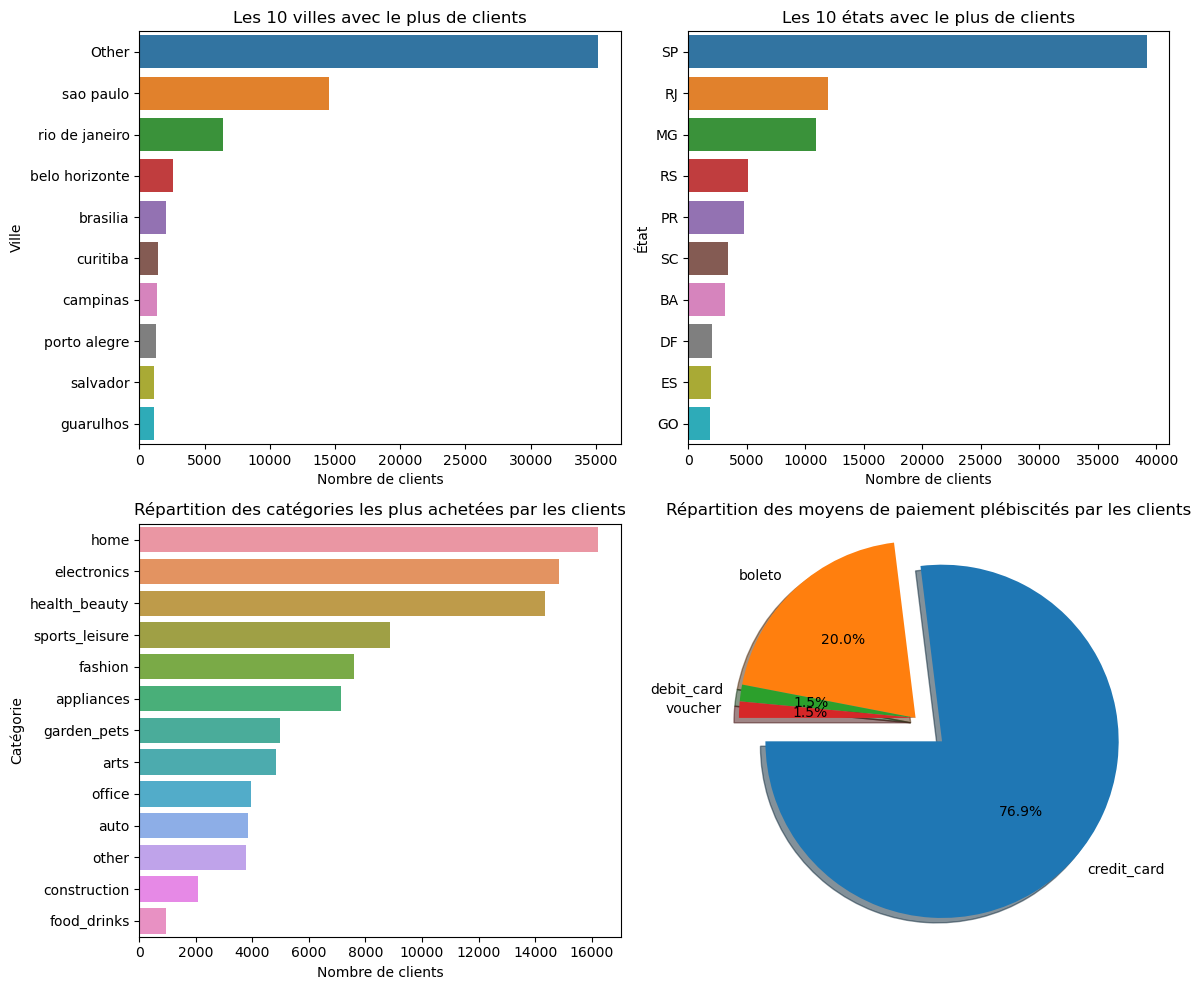

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica 1
cities = data_clients['customer_city'].value_counts().head(10)
state = data_clients['customer_state'].value_counts().head(10)

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfica 1 - Les 10 villes avec le plus de clients
axes[0, 0].set_title('Les 10 villes avec le plus de clients')  # Les 10 villes avec plus de clients
sns.barplot(ax=axes[0, 0], x=cities.values, y=cities.index)
axes[0, 0].set_xlabel('Nombre de clients')  # Número de clientes
axes[0, 0].set_ylabel('Ville')  # Ville

# Gráfica 2 - Les 10 états avec le plus de clients
axes[0, 1].set_title('Les 10 états avec le plus de clients')  # Les 10 états avec le plus de clients
sns.barplot(ax=axes[0, 1], x=state.values, y=state.index)
axes[0, 1].set_xlabel('Nombre de clients')  # Nombre de clients
axes[0, 1].set_ylabel('État')  # Estado

# Gráfica 3
categories = data_clients['Cat_la_plus_achetee'].value_counts().sort_values(ascending=False)

axes[1, 0].set_title('Répartition des catégories les plus achetées par les clients')  # Distribución de las categorías más compradas por los clientes
sns.barplot(ax=axes[1, 0], x=categories.values, y=categories.index)
axes[1, 0].set_xlabel('Nombre de clients')  # Nombre de clients
axes[1, 0].set_ylabel('Catégorie')  # Categorie

# Gráfica 4
payment = data_clients['Moy_Paiment'].value_counts().sort_values(ascending=False)

axes[1, 1].set_title('Répartition des moyens de paiement plébiscités par les clients')  # Distribución de los medios de pago preferidos por los clientes
explode = [0.2, 0, 0, 0]
axes[1, 1].pie(payment.values, labels=payment.index, autopct='%1.1f%%', startangle=90+90, shadow=True, explode=explode)
axes[1, 1].axis('equal')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure avec les quatre graphiques
plt.show()


In [40]:
data_clients.columns

Index(['Cat_la_plus_achetee', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'Nb_pdts', 'Tot_moy_achats', 'Mont_max_achats', 'Delai_Moy_Commande', 'Nb_moy_pdts_par_com', 'order_purchase_timestamp', 'heure_achat', 'jour_achat', 'delai_dernier_achat', 'Note_Moy_Com', 'Moy_Paiment', 'Facilités', 'geolocation_lat', 'geolocation_lng', 'home', 'appliances', 'construction', 'office', 'electronics', 'arts', 'fashion', 'health_beauty', 'sports_leisure', 'garden_pets', 'auto', 'food_drinks', 'other'], dtype='object')

In [41]:
import numpy as np

# Agrupar la columna 'Cat_la_plus_achetee' y contar el número de clientes en cada categoría
category_counts = data_clients['Cat_la_plus_achetee'].value_counts()

# Crear un DataFrame con los resultados
category_counts_df = pd.DataFrame({'Catégorie': category_counts.index, 'Nombre de clients': category_counts.values})

# Obtener los valores no NaN para las columnas adicionales
not_nan_values = data_clients.groupby('Cat_la_plus_achetee')['Note_Moy_Com', 'Delai_Moy_Commande', 'Tot_moy_achats'].mean()

# Asignar los valores no NaN al DataFrame category_counts_df
category_counts_df[['Note_Moy_Com', 'Delai_Moy_Commande', 'Tot_moy_achats']] = not_nan_values.values

# Reemplazar los valores NaN por np.nan
category_counts_df = category_counts_df.fillna(np.nan)

print(category_counts_df)


         Catégorie  Nombre de clients  Note_Moy_Com  Delai_Moy_Commande  Tot_moy_achats
0             home              16213       4.15712          -411.18703         4.35963
1      electronics              14828       4.22282          -390.46121         4.39442
2    health_beauty              14351       4.08512          -373.86340         4.46826
3   sports_leisure               8873       4.09174          -305.92086         4.73427
4          fashion               7597       4.03356          -374.39343         4.10117
5       appliances               7125       4.09147          -406.08197         4.70044
6      garden_pets               4987       4.26620          -386.40394         3.93364
7             arts               4849       4.17759          -279.18416         4.48607
8           office               3952       4.15795          -358.91183         4.49162
9             auto               3828       3.99628          -302.64166         4.47559
10           other              

### Le nombre de nouveaux clients par mois

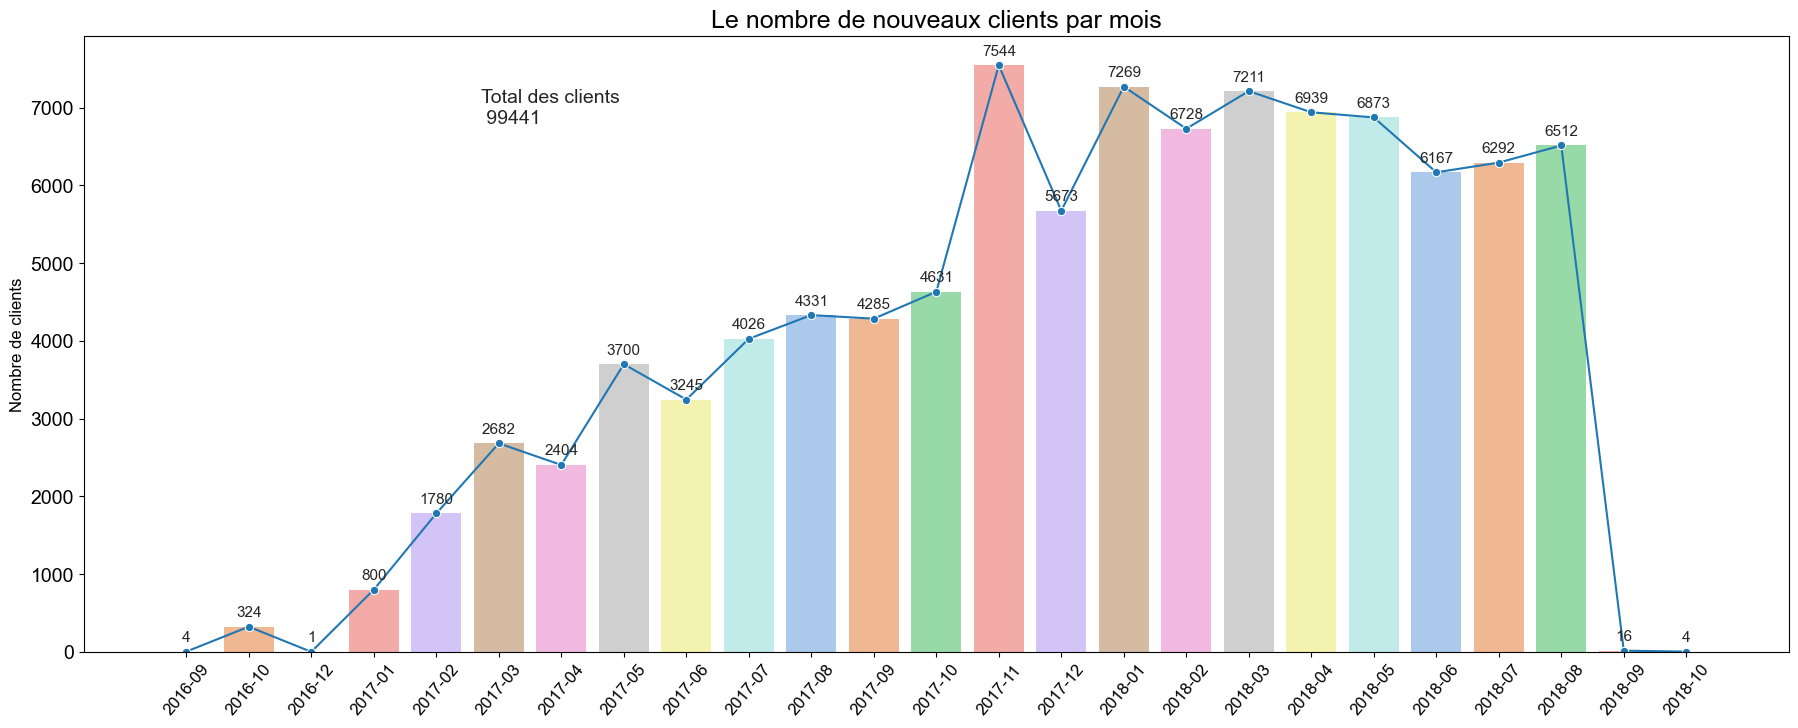

In [42]:
df_olist_evol = orders.sort_values(by=['customer_id', 'order_purchase_timestamp'], ascending=False)
df_olist_evol = df_olist_evol.drop_duplicates(subset='customer_id', keep='first')
df_olist_evol["order_purchase_timestamp"] = df_olist_evol["order_purchase_timestamp"].dt.strftime('%Y-%m')
data_evol = df_olist_evol.groupby(['order_purchase_timestamp']).agg(nb_client=("customer_id", "count")).reset_index()

fig, ax = plt.subplots(figsize=(22, 8))

sns.barplot(x="order_purchase_timestamp", y="nb_client", data=data_evol, palette="pastel", estimator=sum)
sns.lineplot(x="order_purchase_timestamp", y="nb_client", data=data_evol, palette="husl", marker='o')

sns.set_style("darkgrid")

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=11)

ax.set_ylabel('Nombre de clients', fontsize=12)
plt.xticks(rotation=50, fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=16)
ax.text(p.get_x() / 5, 6800, 'Total des clients\n %s' % df_olist_evol['customer_id'].nunique(), fontsize=14)
plt.title('Le nombre de nouveaux clients par mois', fontsize=18)

plt.show()


### Top 15 des catégories les plus achetées

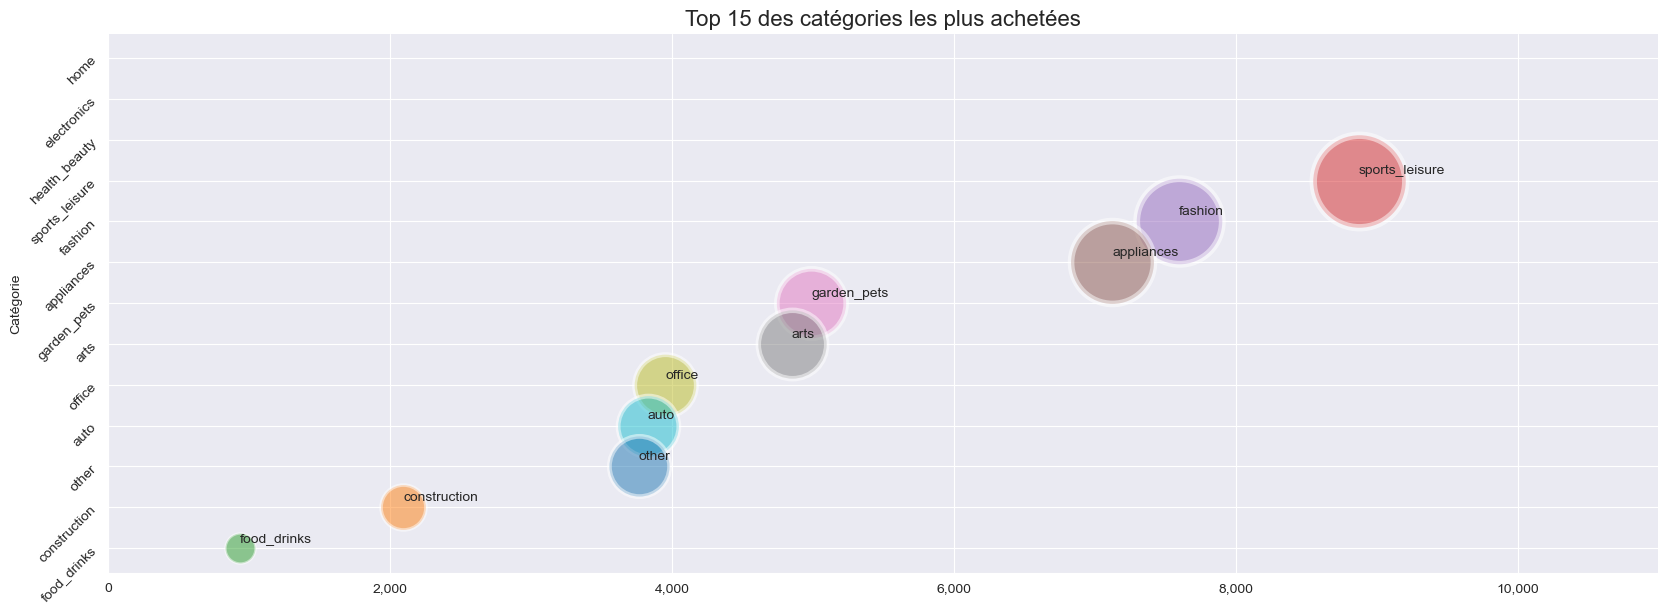

In [43]:
data_clients['order_purchase_year_month'] = data_clients['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_product_category = data_clients.groupby("Cat_la_plus_achetee").agg(order_purchase_year_month=("order_purchase_year_month", "count")).reset_index().sort_values(by="order_purchase_year_month", ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20, 7))

for product in df_product_category["Cat_la_plus_achetee"].unique():
    data = df_product_category[df_product_category["Cat_la_plus_achetee"] == product]
    sns.scatterplot(x=data['order_purchase_year_month'], y=data['Cat_la_plus_achetee'], data=df_product_category,
                    s=0.5*data['order_purchase_year_month']**1, alpha=0.5, palette='bright')

for index, row in df_product_category.iterrows():
    ax.annotate(row['Cat_la_plus_achetee'],
                 (row['order_purchase_year_month'], row['Cat_la_plus_achetee']),
                 textcoords="offset points",
                 xytext=(0, 5),
                 ha='left')

ax.set_xlabel("")
ax.set_ylabel("Catégorie")
ax.set_title("Top 15 des catégories les plus achetées", size=16)
ax.set_xlim(0, 11000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_tick_params(labelrotation=45)

plt.show()




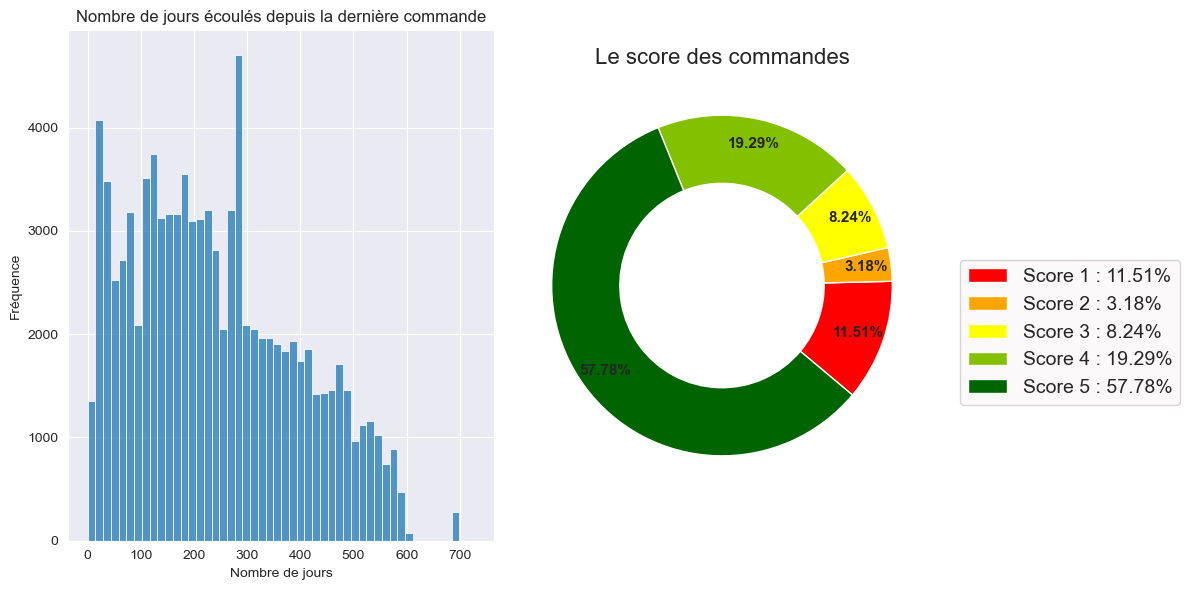

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graphique 1 : Histogramme du nombre de jours depuis la dernière commande
delai_achat = data_clients['order_purchase_timestamp'].max() - data_clients['order_purchase_timestamp']
delai_achat_days = delai_achat.dt.days

axes[0].set_title('Nombre de jours écoulés depuis la dernière commande')
sns.histplot(delai_achat_days, bins=50, ax=axes[0])

axes[0].set_xlabel('Nombre de jours')
axes[0].set_ylabel('Fréquence')

# Graphique 2 : Graphique en secteurs des scores des commandes
data_score = order_reviews.groupby('review_score')['order_id'].count()
total_scores = data_score.sum()
data_score = (data_score / total_scores) * 100

colors = ['red', 'orange', 'yellow', '#83c000', 'darkgreen']
labels = ['Score {} : {:.2f}%'.format(score, percentage) for score, percentage in zip(data_score.index, data_score)]

wedges, texts, autotexts = axes[1].pie(data_score, wedgeprops=dict(width=0.4), startangle=-40, colors=colors,
                                      autopct='%1.2f%%', pctdistance=0.85, textprops={'fontsize': 13})

plt.setp(autotexts, size=11, weight='bold')

axes[1].legend(wedges, labels, loc=[1.06, 0.22], fontsize=14, facecolor='#fbf8f8')
axes[1].set_title('Le score des commandes', fontsize=16)

# Ajustement de l'espace entre les sous-graphiques et affichage de la figure
plt.tight_layout()
plt.show()


Après avoir examiné les distributions des variables, nous pouvons tirer les conclusions suivantes :

* La majorité des clients ont effectué un seul achat, indiquant une faible récurrence d'achats multiples.
* Les distributions des montants d'achat par catégorie suivent une tendance exponentielle, suggérant une concentration de montants plus faibles avec quelques montants élevés.
* En ce qui concerne la variable "price food drinks", elle ne semble pas apporter d'informations significatives pour notre analyse.

### Corrélations

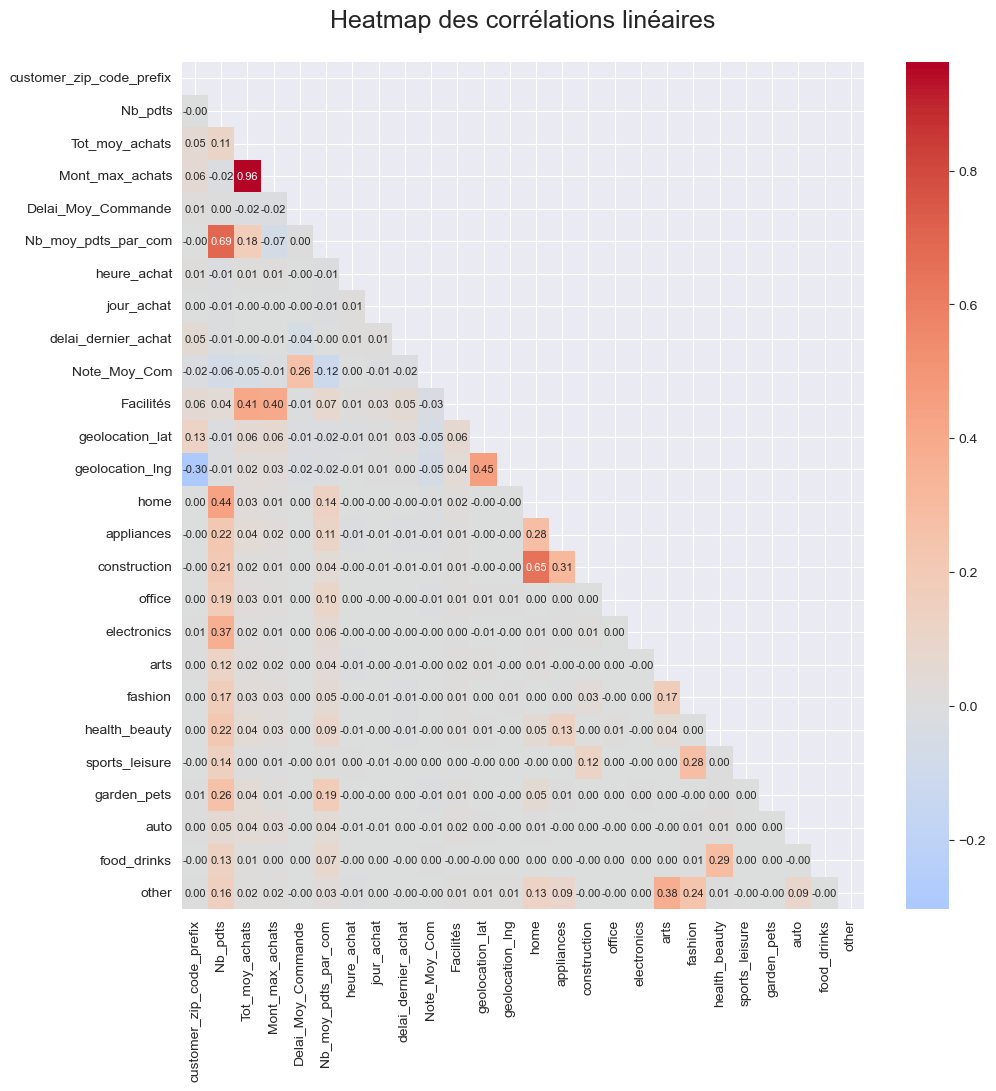

In [45]:
corr = data_clients.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11,11))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

In [46]:
threshold = 0.65

corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
2,Tot_moy_achats,Mont_max_achats,0.96203
0,Nb_pdts,Nb_moy_pdts_par_com,0.69426


##  Commentaires

1. **La première ligne** du résultat montre une corrélation très forte de 0.96203 entre les variables "Tot_moy_achats" (Total des achats moyens) et "Mont_max_achats" (Montant maximal des achats). Cela indique qu'il existe une relation linéaire positive très élevée entre ces deux variables. En d'autres termes, lorsque le total moyen des achats augmente, le montant maximal des achats a tendance à augmenter également, et vice versa.                                                                             

2. **La deuxième ligne** du résultat montre une corrélation de 0.69426 entre les variables "Nb_pdts" (Nombre de produits) et "Nb_moy_pdts_par_com" (Nombre moyen de produits par commande). Cette corrélation indique une relation positive modérée entre ces deux variables. Il est possible que les clients qui achètent un plus grand nombre de produits par commande aient tendance à acheter un plus grand nombre total de produits. Cependant, la corrélation n'est pas aussi forte que dans le premier cas.

In [47]:
data_clients.drop(['Mont_max_achats','Nb_moy_pdts_par_com','order_purchase_year_month'], axis=1, inplace=True)

<div class="alert alert-success">
    <font id="section_6">
    <h1 style="font-size:25px;"><strong>06. Export jeu de données</strong></h1>
</div>

In [48]:
data_clients.select_dtypes(['object']).nunique()

Cat_la_plus_achetee     13
customer_city          101
customer_state          27
Moy_Paiment              4
dtype: int64

In [49]:
data_clients.to_csv('data_cleaned.csv')

In [50]:
data_clients.describe()

,customer_zip_code_prefix,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,home,appliances,construction,office,electronics,arts,fashion,health_beauty,sports_leisure,garden_pets,auto,food_drinks,other
count,93396.00000,93396.00000,93396.00000,93396.00000,93396.00000,93396.00000,93396.00000,93396.00000,93396.00000,93139.00000,93139.00000,9.33960e+04,93396.00000,93396.00000,9.33960e+04,9.33960e+04,93396.00000,93396.00000,93396.00000,9.33960e+04,93396.00000,93396.00000,93396.00000,93396.00000
mean,35202.32792,1.89920,4.44976,-355.60196,14.74300,2.73850,241.71576,4.10428,2.90719,-21.17927,-46.17604,1.79580e+02,50.00831,29.40660,4.55707e+01,2.25374e+02,19.36604,54.75834,67.34061,6.61365e+01,34.99590,17.94917,8.35188,23.03399
std,29811.23809,5.94807,0.92996,2495.77550,5.32511,1.96608,153.15328,1.32488,2.68124,5.62348,4.06155,6.71029e+03,1652.80759,2317.58142,3.59786e+03,3.13622e+04,793.30195,2133.04112,1944.54437,6.96654e+03,1116.88612,679.79324,1057.95716,1460.07301
min,1003.00000,1.00000,-0.16252,-17772.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-33.68989,-72.66882,0.00000e+00,0.00000,0.00000,0.00000e+00,0.00000e+00,0.00000,0.00000,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000
25%,11410.00000,1.00000,3.83945,7.00000,11.00000,1.00000,118.00000,4.00000,1.00000,-23.58946,-48.10863,0.00000e+00,0.00000,0.00000,0.00000e+00,0.00000e+00,0.00000,0.00000,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000
50%,24445.00000,1.00000,4.46591,11.00000,15.00000,3.00000,222.00000,5.00000,2.00000,-22.92356,-46.63116,0.00000e+00,0.00000,0.00000,0.00000e+00,0.00000e+00,0.00000,0.00000,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000
75%,59056.00000,1.00000,5.00997,16.00000,19.00000,4.00000,351.00000,5.00000,4.00000,-20.13000,-43.59919,0.00000e+00,0.00000,0.00000,0.00000e+00,0.00000e+00,0.00000,0.00000,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000
max,99980.00000,576.00000,9.50599,209.00000,23.00000,6.00000,728.00000,5.00000,24.00000,42.18400,-8.72376,1.38286e+06,302400.00000,671720.00000,1.00921e+06,9.40032e+06,147712.25000,394800.00000,374837.76000,2.10726e+06,172125.00000,145630.80000,284990.00000,316800.00000


<div class="alert alert-success">
    <font id="section_7">
    <h1 style="font-size:25px;"><strong>07. Liens importants</strong></h1>
</div>

* <a href="https://openclassrooms.com/fr/paths/164/projects/630/assignment" target="_blank">Lien vers consignes : </a>

* <a href="https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_orders_dataset.csv" target="_blank">Kaggle Brazilian E-Commerce Public Dataset by Olist: </a>

* <a href="https://olist.com/pt-br/" target="_blank">Lien vers Olist: </a>

* Notebooks consultés
* 1. <a href="https://www.kaggle.com/code/mohamedtrabis/p5-01-notebookanalyse" target="_blank">Kaggle Notebook 1  : </a>
* 2. <a href="https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering" target="_blank">Kaggle Notebook 2  : </a>

<div class="alert alert-success">
    <font id="section_Dataset">
    <h1 style="font-size:25px;"><strong>08. Brazilian E-Commerce Public Dataset by Olist</strong></h1>
</div>



**olist_customers_dataset.csv**
This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customer_id. This means that the same customer will get different ids for different orders. The purpose of having a customer_unique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

**olist_geolocation_dataset.csv**

This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.

**olist_order_items_dataset.csv**
This dataset includes data about the items purchased within each order.

Example:
The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

The total order_item value is: 21.33 * 3 = 63.99

The total freight value is: 15.10 * 3 = 45.30

The total order value (product + freight) is: 45.30 + 63.99 = 109.29

**olist_order_payments_dataset.csv**
This dataset includes data about the orders payment options.

**olist_order_reviews_dataset.csv**
This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**olist_orders_dataset.csv**
This is the core dataset. From each order you might find all other information.

**olist_products_dataset.csv**
This dataset includes data about the products sold by Olist.

**olist_sellers_dataset.csv**
This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

**product_category_name_translation.csv**
Translates the product_category_name to english.

========================================================

In [51]:
#Enregistrer le temps de fin
fin = time.time()

In [52]:
#Calculer la durée en minutes
durée = (fin - début) / 60

In [53]:
#Afficher le temps d'exécution
print("Le temps d'exécution était de", durée, "minutes.")

Le temps d'exécution était de 1.5542697668075562 minutes.
